In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#Importing Plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode (connected = True) # Turning on Notebook Mode
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [3]:
pwd()

'C:\\Users\\chavsan01\\github\\Python Projects'

In [4]:
from sklearn.model_selection import train_test_split #creating training and testing set
from sklearn.linear_model import LinearRegression #Model

In [8]:
df =pd.read_csv('Salary_Data - Salary_Data.csv')

In [9]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


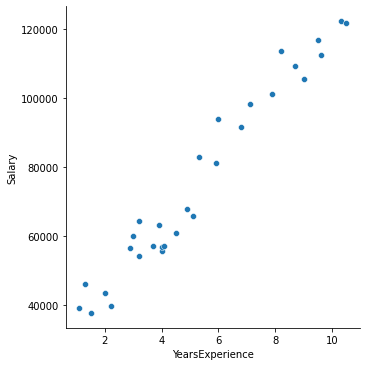

In [10]:
sns.relplot(x="YearsExperience",y="Salary",data=df)

There is a linear relation between YearsExperience and Salary

C:\Users\chavsan01\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

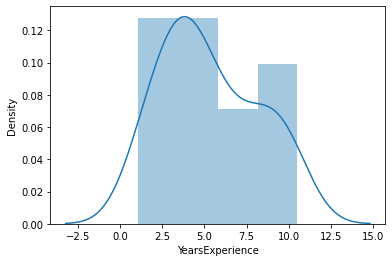

In [12]:
sns.distplot(df['YearsExperience'])

C:\Users\chavsan01\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Salary', ylabel='Density'>

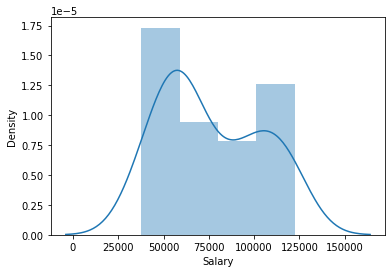

In [13]:
sns.distplot(df['Salary'])

In [14]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [15]:
x=df['YearsExperience'] #independent variable
y=df['Salary'] #dependent variable

In [18]:
x.shape

(30,)

In [19]:
X_matrix=x.values.reshape(-1,1) #converting to 2D array SKlearn need 2d array

In [20]:
X_matrix

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X_matrix,y,test_size=0.20,random_state=101)

In [22]:
X_train

array([[ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3],
       [ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [23]:
X_test

array([[6.8],
       [8.7],
       [3.2],
       [5.9],
       [1.5],
       [9.6]])

In [24]:
model=LinearRegression()

In [25]:
model.fit(X_train,Y_train) # training of model using training data  it is calculating m & C values 

LinearRegression()

In [26]:
model.coef_

array([9440.46383365])

In [27]:
model.intercept_

26040.067657420906

In [28]:
pred_train=model.predict(X_train) # prediction 

In [29]:
pred_train

array([115724.47407705,  74186.43320901, 111004.24216023, 123276.84514397,
        62857.87660864,  44920.99532471,  38312.67064116,  82682.85065929,
       100619.73194322,  63801.922992  ,  53417.41277499,  68522.15490882,
        36424.57787443,  93067.3608763 ,  46809.08809144,  56249.55192509,
        64745.96937537,  60969.78384191,  72298.34044228, 125164.93791069,
       103451.87109331,  54361.45915836,  76074.52597574,  63801.922992  ])

In [30]:
Y_train

26    116969
16     66029
25    105582
28    122391
10     63218
3      43525
1      46205
19     93940
22    101302
12     56957
5      56642
14     61111
0      39343
21     98273
4      39891
8      64445
13     57081
9      57189
15     67938
29    121872
23    113812
6      60150
17     83088
11     55794
Name: Salary, dtype: int64

# Evaluating Regression Model

In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train,pred_train)

In [32]:
mse #training error

37904533.03756702

In [33]:
from math import sqrt
rmse = sqrt (mse)
rmse #training

6156.665740282399

In [34]:
pred_test=model.predict(X_test) # Testing

In [35]:
pred_test

array([ 90235.22172621, 108172.10301013,  56249.55192509,  81738.80427593,
        40200.76340789, 116668.52046041])

In [36]:
Y_test

20     91738
24    109431
7      54445
18     81363
2      37731
27    112635
Name: Salary, dtype: int64

In [37]:
test_mse = mean_squared_error(Y_test,pred_test)

In [38]:
test_mse #testing error

4934969.878489006

In [39]:
test_rmse = sqrt (test_mse)
test_rmse #testing

2221.4792095558773

In [40]:
model.score(X_train,Y_train) # Training accuracy  R2 

0.9467662384202531

In [41]:
model.score(X_test,Y_test) # Testing accuracy  R2 

0.993422386435995

In [42]:
allpred= model.predict(X_matrix)

NameError: name 'x_matrix' is not defined